## Decision Trees

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll supply the money, and you'll supply models that predict how much various houses are worth.

You ask your cousin how he's predicted real estate values in the past. and he says it is just intuition. But more questioning reveals that he's identified price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Below is one of the patterns he has used

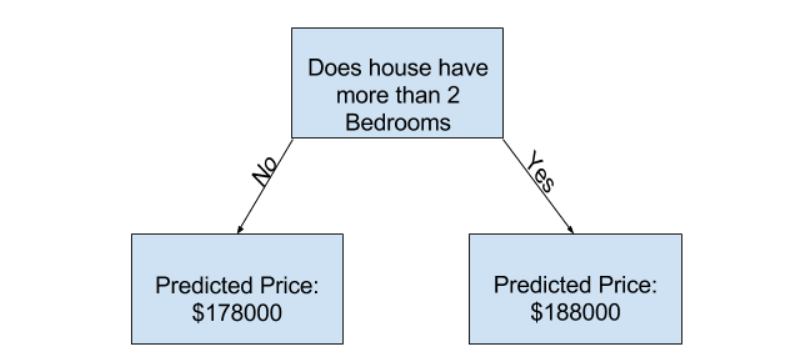

Essentially what he has used is something called a Decision Tree. You can have more branches to the trees and make a very complex looking one too.

After some more questioning you found that this is what essentially your cousin does

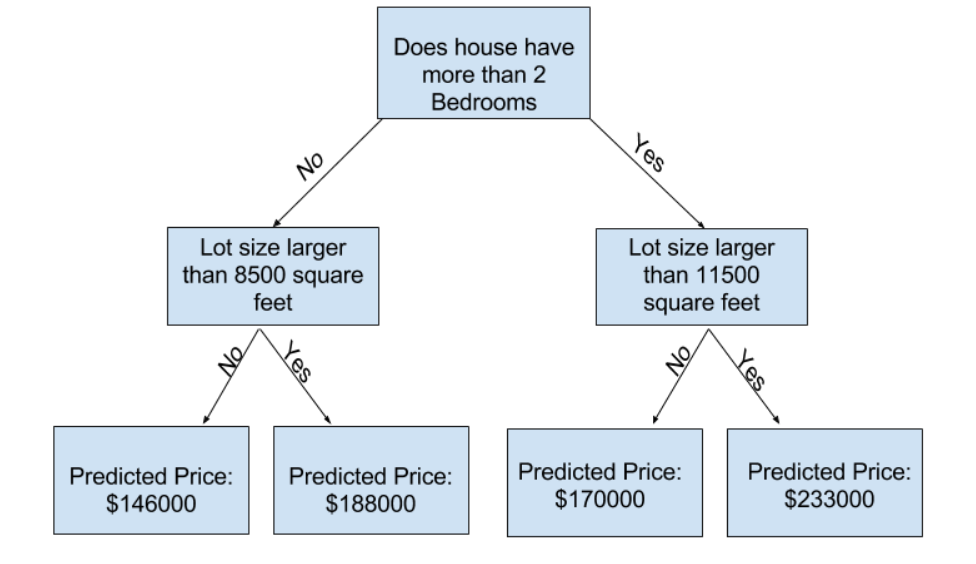

In general a decision tree asks a question and then classifies the data based on that question.

It is a supervised learning algorithm that is the base for some of the more accurate machine learning algorithms like Bagging and Boosting that currently exist.

So now that you know what a decision tree is let's build a decision tree from scratch in Python!!

In [30]:
import numpy as np
import pandas as pd

We will be using the following data which has 4 columns out of which the last one is the target column

In [35]:
data = pd.read_csv('data.csv')
data.head()

,Blocked Arteries,Chest_Pain,Good Blood Circulation,Heart Disease
0,1,0,1,0
1,1,1,1,0
2,0,1,1,1
3,0,1,1,1
4,0,0,1,1


We will break this whole tutorial into 3 parts:

1.Gini Index

2.Creating splits in the Dataset

3.Making Predictions 

So without any further delay, let's get started with it!!

## Training a Decision Tree

## Gini Index

In the example that we used above, where your Cousin predicted the price of the house he was going to sell, he used the number of bedrooms in the house as the first parameter through which he classified the data. He did this based on his intuition, but how will a computer know which is the first parameter that will make the best split? 

To tackle this problem we have something called the Gini Index that is a kind of loss function which helps us decide the parameters to use to split the data.

Let us assume for now that the best split is made by the 'Blocked Arteries' parameter. We then Compare how it affects the target value. We check how related having a Blocked Artery or not, is to having a heart disease. We then get some kind of picture as shown below.

This computation has already been done for the whole dataset. So we can see that there are 215 patients who have a heart disease when they have a blocked artery and 227 who dont. The same can be said about the right Leaf.

A node is a point where the data get split into two or more subsets, a leaf does not split further and is used to represent the samples present in that split

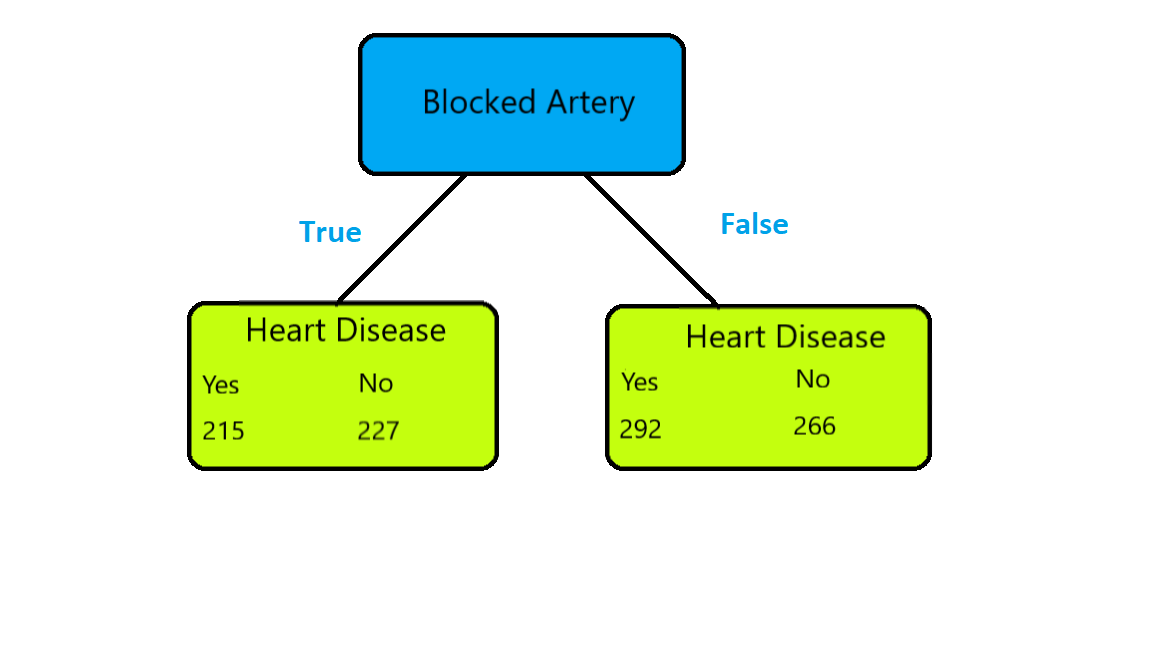

We then need to calculate the gini index for each 'Leaf' which is denoted in Green. It is calculated as follows:

Gini Index = 1 - $(probability\:of "yes")^{2}$ - $(probability\:of "no")^{2}$

For the left leaf the gini index is:

Gini Index = 1 - $(215/(215+227))^{2}$ - $(227/(215 + 227))^{2}$
    
         = 1 - 0.237 - 0.264 
         = 0.499

Similarly for the right leaf the gini index is:

Gini Index = 0.499

Now we need to find the overall gini index.

For this we take a weighted average for the gini index of both the leaves where the weights are the number of samples in each leaf.

Gini Index for Blocked Arteries = (442 * 0.499 + 558 * 0.499)/(442 + 442)

                      = 0.499

Given below is the code that represents all the above calculation. This can be used to calculate the gini index for any Feature

In [36]:
# Calculate the Gini index for the dataset
def gini_index(groups):
    #getting the counts for each type of patient
    count1 = len([entry for entry in groups if (entry[0] == 1 and entry[1]==1)])
    count2 = len([entry for entry in groups if (entry[0] == 1 and entry[1]==0)])
    count3 = len([entry for entry in groups if (entry[0] == 0 and entry[1]==1)])
    count4 = len([entry for entry in groups if (entry[0] == 0 and entry[1]==0)])
    total = count1 + count2 + count3 + count4
    gini_leaf_1 = 1 - ((count1/(count1 + count2))**2) - ((count2/(count1 + count2))**2)
    gini_leaf_2 = 1 - ((count3/(count3 + count4))**2) - ((count4/(count3 + count4))**2)
    gini = ((count1 + count2)*gini_leaf_1 + (count3 + count4)*gini_leaf_2)/total
    return gini

To apply this function first we will need to get the data into a form which we can pass to this function

In [38]:
Blocked_artery_groups = [[data.iloc[c,0],data.iloc[c,3]] for c in range(1000)] 
# iloc helps us retrieve elements from a dataframe
print(gini_index(Blocked_artery_groups))

0.49923136930537304


As you can see the gini index we calculated above and this one is the same

We will now calculate it for the other features too

In [39]:
Chest_Pain_groups = [[data.iloc[c,1], data.iloc[c,3]] for c in range(1000)]
print(gini_index(Chest_Pain_groups))

0.4999016103059582


In [40]:
Blood_Circulation_groups = [[data.iloc[c,2], data.iloc[c,3]] for c in range(1000)]
print(gini_index(Blood_Circulation_groups))

0.49926660822716157


Now that we have done this, we can see that the 'Blocked Artery' Parameter is the one that has the least Gini Index, so we will use that as our first split. (Remember that Gini Index was something like a loss function?)

## Creating Splits in the Data

Now that we have decided the best parameter on which we will split the data, We need to create this split in the data.

In [41]:
Not_Blocked = data[data['Blocked Arteries'] == 0] #Patients without Blocked Arteries
Blocked = data[data['Blocked Arteries'] == 1] # Patients with Blocked Arteries

We then need to have a similar process to decide which will be the next feature for splitting each subset that we created. Note that now that we have split the data, it is possible that the splitting parameter will be different for each subset. The only way we will know is by calculating the gini index. So let's go ahead and do that.

Let's start with the Not Blocked data.

In [43]:
Chest_Pain_Not_Blocked_Groups = [[Not_Blocked.iloc[c,1], Not_Blocked.iloc[c,3]] for c in range(len(Not_Blocked))]
print(gini_index(Chest_Pain_Not_Blocked_Groups))

0.49842059183450127


In [44]:
Blood_Circulation_Not_Blocked_Groups = [[Not_Blocked.iloc[c,2], Not_Blocked.iloc[c,3]] for c in range(len(Not_Blocked))]
print(gini_index(Blood_Circulation_Not_Blocked_Groups))

0.49760408741733025


We can see that the next parameter for splitting the Not_Blocked is the Blood Circulation

Now let us do that same thing for the Blocked data.

In [45]:
Chest_Pain_Blocked_Groups = [[Blocked.iloc[c,1], Blocked.iloc[c,3]] for c in range(len(Blocked))]
print(gini_index(Chest_Pain_Blocked_Groups))

0.49910958102223524


In [46]:
Blood_Circulation_Blocked_Groups = [[Blocked.iloc[c,2], Blocked.iloc[c,3]] for c in range(len(Blocked))]
print(gini_index(Blood_Circulation_Blocked_Groups))

0.49942113555246925


For the Blocked data we can see that the splitting parameter is Chest Pain!!

For the different subsets we have different splitting parameters for the second split!!!

Below is what our decision tree looks like so far

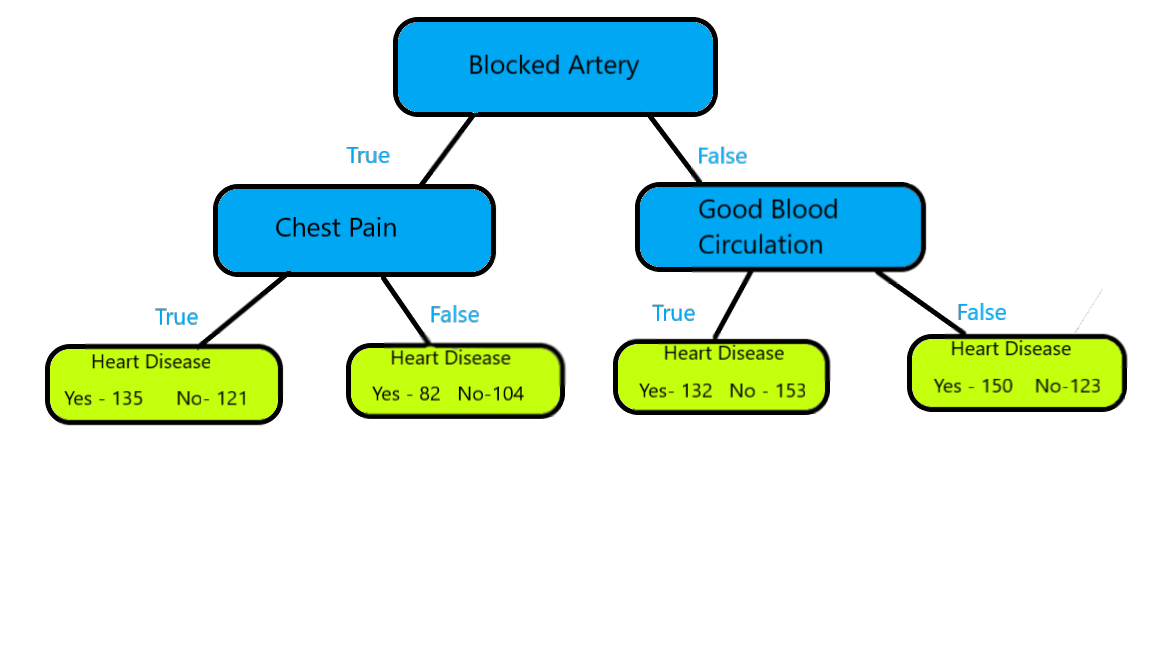

To avoid Complexity let's leave it at this stage. Ideally, you could go deeper into the data by creating more splits which will lead to better results.

## Making Predictions

Now that we have the structure of the decision tree ready, we have to assign either a yes or no value to each 'Leaf' of the tree, since this is a classification problem.

For the first leaf, the majority of the entries are True so we can change that Leaf to the a True value. The second Leaf will become False, Third will be False and last will be True by the same logic.

Let us now implement it in the code

In [48]:
def tree(row):
    if row['Blocked Arteries'] == 1 :
        if row['Chest_Pain'] == 1:
            row['Heart Disease Pred'] = 1
        else:
            row['Heart Disease Pred'] = 0
    else:
        if row['Good Blood Circulation'] == 1:
            row['Heart Disease Pred'] = 0
        else:
            row['Heart Disease Pred'] = 1
    return row

This above code will take every row from the data and predict whether that patient has heart disease or not.

It follows a Decision Tree as shown below

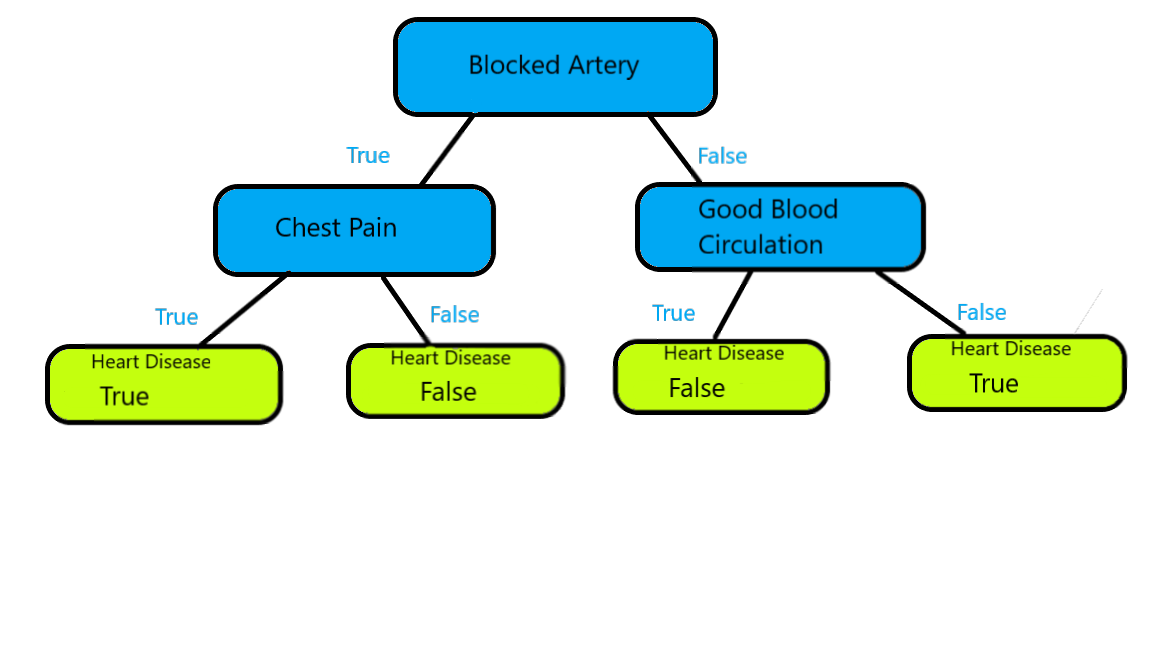

Let's now load the test data and perform some evaluation on our predictions

In [52]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Blocked Arteries,Chest_Pain,Good Blood Circulation,Heart Disease
0,0,0,1,0
1,1,1,0,0
2,1,0,0,0
3,0,1,0,1
4,0,0,1,0


In [53]:
test_data = test_data.apply(tree, axis = 1)
test_data.head()

,Blocked Arteries,Chest_Pain,Good Blood Circulation,Heart Disease,Heart Disease Pred
0,0,0,1,0,0
1,1,1,0,0,1
2,1,0,0,0,0
3,0,1,0,1,1
4,0,0,1,0,0


In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_data['Heart Disease'], test_data['Heart Disease Pred']))

0.83


As you can see we have acheived 83% accuracy with such a simple tree. The accuracy will increase for sure as we increase the depth of the tree, as long as we don't start overfitting the training data.

In the next notebook we will be talking about Bagging and Boosting which are some of the algorithms that provide much better results. (Remember we talked about it in the starting of this tutorial?)